In [76]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [77]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [78]:
# Visualize an image
def plot_image(i):
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

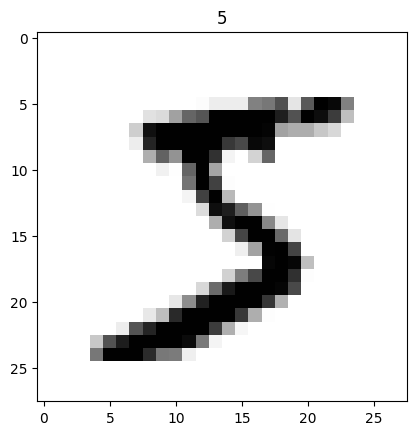

In [79]:
# Plot a sample image
for i in range(1):
    plot_image(i)

In [80]:
# Preprocessing the images
# Normalize images to [0,1] range
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# Reshape the image to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [81]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [82]:
# Check the shapes of x_train, y_train, x_test, y_test
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [83]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))

# Output layer with 10 units for 10 classes
model.add(Dense(10, activation="softmax"))

In [84]:
# Compile the model with 'categorical_crossentropy' for one-hot encoded labels
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [85]:
# Callbacks for early stopping and saving the best model
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint("./bestmodel.keras", monitor='val_accuracy', verbose=1, save_best_only=True)
cb = [es, mc]

In [87]:
# Train the model
his = model.fit(x_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9897 - loss: 0.0322
Epoch 1: val_accuracy did not improve from 0.98706
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 2/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9911 - loss: 0.0263
Epoch 2: val_accuracy improved from 0.98706 to 0.98789, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9879 - val_loss: 0.0406
Epoch 3/50
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9921 - loss: 0.0241
Epoch 3: val_accuracy improved from 0.98789 to 0.98856, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9886 - val_loss: 0.0393
Epoch 4/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9924 - loss: 0.0214
Epoch 4: val_accuracy improved from 0.98856 to 0.98939

In [88]:
# Evaluate the model on the test set
score = model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0458
Test accuracy: 0.9894999861717224
